In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as const
import scipy.integrate as spi
from scipy.misc import derivative
hbar=1
m=1
def energy1DPIB(n):
    return ((hbar*np.pi*n/L)**2)/(2*m)
def psi1DPIB(x,n):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

Minima at alpha= 0.7857912263013305 and Minimum energy value: -0.40569002546846034


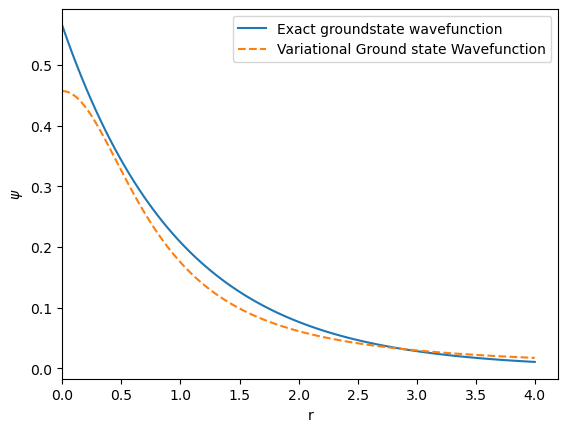

In [3]:
#QUES 2: Lorentzian Hydrogen atom
from scipy.optimize import minimize
mu=1
el=0
Z=1
trialHAtom = lambda r,alpha: np.exp(-alpha*r)
LorHAtom = lambda r,alpha: (np.sqrt(alpha))/(np.pi*(alpha*alpha+r*r))
def variationalEnergy(alpha):
    def R(r):
        return (sp.sqrt(alpha))/(sp.pi*(alpha*alpha+r*r))
    x=sp.symbols('x',real=True)
    dR_dr = sp.lambdify(x,sp.diff(R(x),x),'numpy')
    dSqR_drSq = sp.lambdify(x,sp.diff(sp.diff(R(x),x),x),'numpy')
    def integrand1(r):
        return (r*r)*LorHAtom(r,alpha)*((-1/(2*mu))*(dSqR_drSq(r)+(2/r)*dR_dr(r))+(el*(el+1)*(LorHAtom(r,alpha)/(2*mu*mu)))-(Z*LorHAtom(r,alpha)/r))
    def integrand2(r):
            return r*r*(LorHAtom(r,alpha))*(LorHAtom(r,alpha))
    integral1, error1 = spi.quad(integrand1,1e-6,1000)
    integral2, error2 = spi.quad(integrand2,1e-6,1000)
    return integral1/integral2
def objective_function(x):
    return variationalEnergy(x[0])
initial_guess = [0.2]
bounds = [(0.1,0.5)]
result = minimize(objective_function, initial_guess)
print('Minima at alpha=',result.x[0],'and Minimum energy value:',result.fun)
rvals = np.linspace(1e-6,4,100)
plt.plot(rvals,trialHAtom(rvals,1)/np.sqrt(np.pi),label='Exact groundstate wavefunction')
plt.plot(rvals,LorHAtom(rvals,result.x[0]),linestyle='--',label='Variational Ground state Wavefunction')
plt.legend()
plt.xlabel('r')
plt.ylabel(r'$\psi$')
plt.xlim(0)
plt.show()

     fun: -0.038659719820854525
     jac: array([-0.07526815, -0.0565951 , -0.02649888,  0.00402339])
 message: 'Optimization terminated successfully'
    nfev: 151
     nit: 28
    njev: 28
  status: 0
 success: True
       x: array([0.82032808, 0.27519832, 0.20140312, 1.32596264])


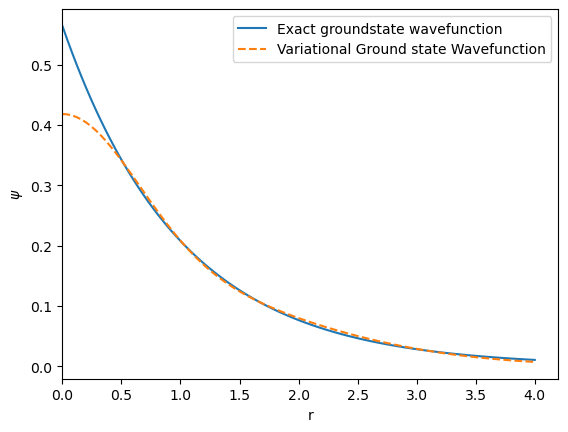

In [7]:
#QUES Multiple Guassian Hydrogen atom
from scipy.optimize import minimize
mu=1
el=0
Z=1
trialHAtom = lambda r,alpha: np.exp(-alpha*r)
def trialHAtomGaussian(r,c1,c2,alpha1,alpha2): 
    return (c1*((2*alpha1/np.pi)**(3/4))*np.exp(-alpha1*r*r))+(c2*((2*alpha2/np.pi)**(3/4))*np.exp(-alpha2*r*r))
def variationalEnergy(c1,c2,alpha1,alpha2):
    def R(r):
        return (c1*((2*alpha1/sp.pi)**(3/4))*sp.exp(-alpha1*r*r))+(c2*((2*alpha2/sp.pi)**(3/4))*sp.exp(-alpha2*r*r))
    x=sp.symbols('x',real=True)
    dR_dr = sp.lambdify(x,sp.diff(R(x),x),'numpy')
    dSqR_drSq = sp.lambdify(x,sp.diff(sp.diff(R(x),x),x),'numpy')
    def integrand1(r):
        return (r*r)*trialHAtomGaussian(r,c1,c2,alpha1,alpha2)*((-1/(2*mu))*(dSqR_drSq(r)+(2/r)*dR_dr(r))+(el*(el+1)*(trialHAtomGaussian(r,c1,c2,alpha1,alpha2)/(2*mu*mu)))-(Z*trialHAtomGaussian(r,c1,c2,alpha1,alpha2)/r))
    integral1, error1 = spi.quad(integrand1,1e-6,1000)
    return integral1
def objective_function(x):
    return variationalEnergy(x[0],x[1],x[2],x[3])
initial_guess = [0.2,0.2,0.275,0.2829]
bounds = [(-1,1),(-1,1),(0,1.5),(0,1.5)]
def constraint(x):
    def integrand2(r):
            return 4*np.pi*r*r*(trialHAtomGaussian(r,x[0],x[1],x[2],x[3]))*(trialHAtomGaussian(r,x[0],x[1],x[2],x[3]))
    integral2,error2 = spi.quad(integrand2,1e-6,1000)
    return integral2 - 1

constraints = ({'type': 'eq', 'fun': constraint})
result = minimize(objective_function, initial_guess,bounds=bounds,constraints=constraints)
print(result)

rvals = np.linspace(1e-6,4,100)
plt.plot(rvals,trialHAtom(rvals,1)/np.sqrt(np.pi),label='Exact groundstate wavefunction')
plt.plot(rvals,trialHAtomGaussian(rvals,result.x[0],result.x[1],result.x[2],result.x[3]),linestyle='--',label='Variational Ground state Wavefunction')
plt.legend()
plt.xlabel('r')
plt.ylabel(r'$\psi$')
plt.xlim(0)
plt.show()


In [8]:
#QUES 4.4 (A)
m=1
L=5
nBasis = 5
def lowestEval(b):
    V = lambda x: b*x
    x= sp.symbols('x', real=True)
    psi1DPIB= lambda n: (sp.sqrt(2/L) * sp.sin(n * sp.pi * x/L))
    hMatr = np.zeros((nBasis, nBasis))
    for i in range(nBasis):
        for j in range(nBasis):
            expression = psi1DPIB(i+1)*((-1/(2*m))*sp.diff(sp.diff(psi1DPIB(j+1),x),x)+(V(x))*psi1DPIB(j+1))
            hMatr[i,j]= sp.integrate(expression,(x,0,L))
    eigenvalues, eigenvectors = np.linalg.eig(hMatr)
    c= eigenvectors[eigenvalues==np.min(eigenvalues)][0]
    Sum=0
    X=sp.symbols('X',real=True)
    for i in range(nBasis):
        Sum+=c[i]*psi1DPIB(i+1)
    #print(c)
    return Sum


X=np.linspace(0,L,1000)
Bvals= [0, 0.05, 0.1,0.2,0.4,0.5,1.0]

for B in Bvals:
    variationalFunction= sp.lambdify(x,lowestEval(B))
    plt.plot(X,-1*variationalFunction(X) if b in [0.4,0.5] else variationalFunction(X),label='b=%1f'%(B))
plt.legend()
plt.show()


NameError: name 'x' is not defined

COMMENT:
For b=1, approximation is not good enough

NameError: name 'x' is not defined

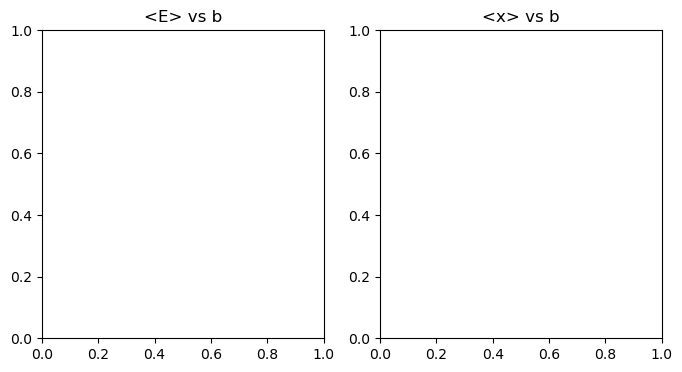

In [9]:
fig,axs= plt.subplots(1,2, figsize=(8,4))
axs[0].set_title("<E> vs b")
axs[1].set_title("<x> vs b")
Exp_E=[]
Exp_x=[]
for B in Bvals:
    V = lambda x: B*x
    variationalFunction= sp.lambdify(x,lowestEval(B))
    x=sp.symbols('x',real=True)
    dSqVr_dxSq = sp.lambdify(x,sp.diff(sp.diff(lowestEval(B),x),x),'numpy')
    def integrand1(X):
        return variationalFunction(X)*(((-hbar**2/(2*m)))*dSqVr_dxSq(X)+V(X)*variationalFunction(X))
    def integrand2(X):
        return variationalFunction(X)*X*variationalFunction(X)
    integral1,error1=spi.quad(integrand1,0,L)
    integral2,error2=spi.quad(integrand2,0,L)
    Exp_E.append(integral1)
    Exp_x.append(integral2)
axs[0].scatter(Bvals,Exp_E)
axs[1].scatter(Bvals,Exp_x)
plt.show()
    

In [10]:
Exp_T=[]
Exp_V=[]
for B in Bvals:
    V = lambda x: B*x
    variationalFunction= sp.lambdify(x,lowestEval(B))
    x=sp.symbols('x',real=True)
    dSqVr_dxSq = sp.lambdify(x,sp.diff(sp.diff(lowestEval(B),x),x),'numpy')
    def integrand1(X):
        return variationalFunction(X)*((-hbar**2/(2*m)))*dSqVr_dxSq(X)
    def integrand2(X):
         return variationalFunction(X)*(V(X))*variationalFunction(X)
    integral1,error1=spi.quad(integrand1,0,L)
    integral2,error2=spi.quad(integrand2,0,L)
    Exp_T.append(integral1)
    Exp_V.append(integral2)
print(Exp_T)
print(Exp_V)

NameError: name 'x' is not defined

COMMENT: For b greater than or equal to 0.1, we can see that the virial theorem is being followed, which is 2\<T> = \<V>

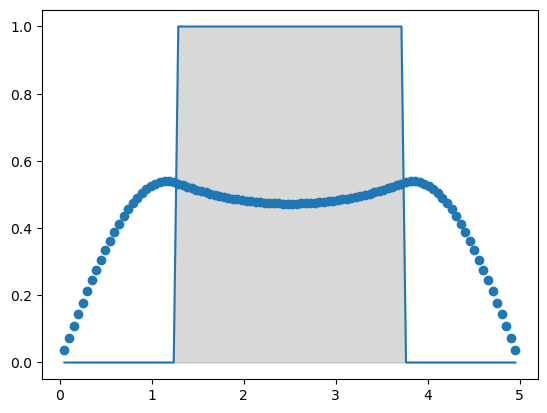

In [11]:
#QUES 4-5 (a) : Approximate Ground state of a Particle in a box with a bump
nPoints = 100
L = 5
m = 1
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
x = []
for i in range(0,nPoints):
    x.append((i+1)*a)
Upotn=1
x=np.array(x)
V=np.full_like(x,0)
V[(L/4 <= x) & (x <= 3*L/4)]=Upotn
plt.fill_between(x, V, interpolate=True, color='gray', alpha=0.3)
plt.plot(x,V)
hMatr = np.zeros((nPoints,nPoints))
for i in range(nPoints):
    hMatr[i,i] = V[i]+2*t
for i in range(nPoints-1):
    hMatr[i,i+1]=-1*t
for i in range(1,nPoints):
    hMatr[i,i-1]=-1*t
eigenvalues, eigenvectors = np.linalg.eig(hMatr)
desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[0])[0][0]  # Change this to the index you want
estate2 = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
plt.scatter(x,-1*estate2)
plt.show()

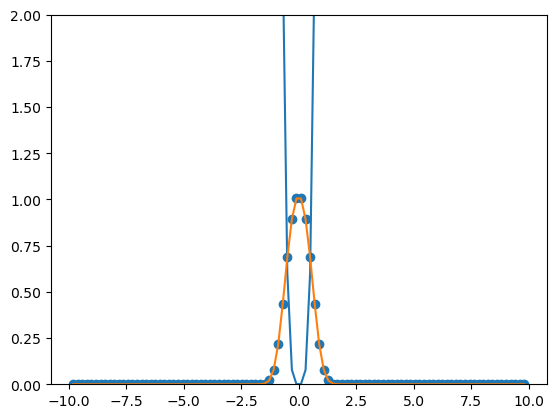

In [12]:
#Ques 4-6 : Quartic oscillator
# (a)
nPoints = 100
L = 20
m = 1
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
c = 10
X = []
for i in range(0,nPoints):
    X.append(-10+(i+1)*a)
x=np.array(X)
V= c*x**4
plt.plot(x,V)
plt.ylim(0,2)

hMatr = np.zeros((nPoints,nPoints))
for i in range(nPoints):
    hMatr[i,i] = V[i]+2*t
for i in range(nPoints-1):
    hMatr[i,i+1]=-1*t
for i in range(1,nPoints):
    hMatr[i,i-1]=-1*t
eigenvalues1, eigenvectors = np.linalg.eig(hMatr)
desired_eigenvalue_index = np.where(eigenvalues1==np.sort(eigenvalues1)[0])[0][0]  # Change this to the index you want
estate = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
plt.plot(x,estate)
plt.scatter(x,estate)
plt.show()

Minima at beta= 1.9574333264280541 and Minimum energy value: 1.4680753654384162


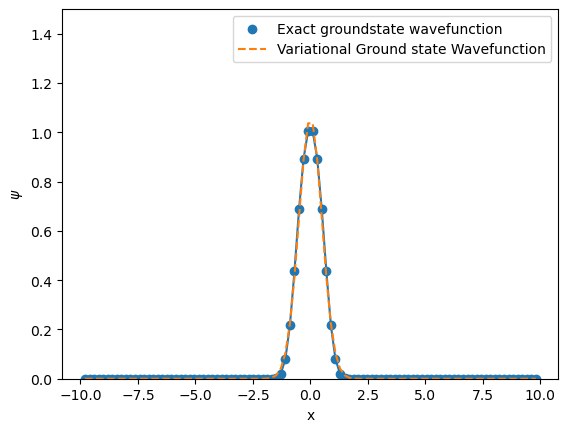

In [13]:
# (b)
from scipy.optimize import minimize
x=sp.symbols('x',real=True)
def trialfun(x,beta):
    def integrand2(x):
            return np.exp(-beta*x**2)*np.exp(-beta*x**2)
    integral2, error2 = spi.quad(integrand2,-1000,1000)
    return sp.exp(-beta*x**2)/np.sqrt(integral2)

def V(x):
    return c*x**4

def variationalEnergy(beta):
    x=sp.symbols('x',real=True)
    dT_dx = sp.lambdify(x,sp.diff(trialfun(x,beta),x),'numpy')
    dSqT_dxSq = sp.lambdify(x,sp.diff(sp.diff(trialfun(x,beta),x),x),'numpy')
    def integrand1(x):
        return trialfun(x,beta)*((-hbar**2/(2*m))*dSqT_dxSq(x)+V(x)*trialfun(x,beta))
    integral1, error1 = spi.quad(integrand1,-1000,1000)
    return integral1
def objective_function(x):
    return variationalEnergy(x[0])
initial_guess = [0.75]
bounds = [(0.6,0.9)]
result = minimize(objective_function, initial_guess)
print('Minima at beta=',result.x[0],'and Minimum energy value:',result.fun)
X=np.array(X)
plt.scatter(X,estate,label='Exact groundstate wavefunction')
plt.plot(X,estate)
def trialf(x,beta):
    def integrand2(x):
            return np.exp(-beta*x**2)*np.exp(-beta*x**2)
    integral2, error2 = spi.quad(integrand2,-1000,1000)
    return np.exp(-beta*x**2)/np.sqrt(integral2)
plt.plot(X,trialf(X,result.x[0]),linestyle='--',label='Variational Ground state Wavefunction')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\psi$')
#plt.xlim(0)
plt.ylim(0,1.5)
plt.show()


In [14]:
#(c)
import scipy
beta=result.x[0]
nBasis=3
def trialfun(x,beta):
    def integrand2(x):
            return np.exp(-beta*x**2)*np.exp(-beta*x**2)
    integral2, error2 = spi.quad(integrand2,-1000,1000)
    return sp.exp(-beta*x**2)/np.sqrt(integral2)
basisFn= lambda x,i: trialfun(x,(2**i)*0.5*beta)
SMatr = np.zeros((nBasis, nBasis))
for i in range(nBasis):
    for j in range(nBasis):
        x=sp.symbols('x')
        expression = basisFn(x,i)*basisFn(x,j)
        SMatr[i,j]= sp.integrate(expression,(x,-1000,1000))
print(SMatr)
HMatr = np.zeros((nBasis, nBasis))
for i in range(nBasis):
    for j in range(nBasis):
        x=sp.symbols('x')
        expression = basisFn(x,i)*((-1/(2*m))*sp.diff(sp.diff(basisFn(x,j),x),x)+V(x)*basisFn(x,j))
        HMatr[i,j]= sp.integrate(expression,(x,-1000,1000))
print(HMatr)
eigenvalues, eigenvectors = scipy.linalg.eig(HMatr,SMatr)
desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[0])[0][0]  # Change this to the index you want
estate2 = eigenvectors[:, desired_eigenvalue_index]
estate2

[[1.00000000e+00 9.70983543e-01 2.16255840e+07]
 [9.70983543e-01 1.00000000e+00 2.34765741e+07]
 [2.16255840e+07 2.34765741e+07 5.84582356e+14]]
[[2.44679314e+00 1.47827273e+00 2.37051629e+07]
 [1.47827273e+00 1.46807537e+00 3.57418705e+07]
 [2.37051629e+07 3.57418705e+07 1.21579860e+15]]


array([ 2.82751115e-01, -9.59193310e-01,  1.63305619e-08])

(0.0, 1.5)

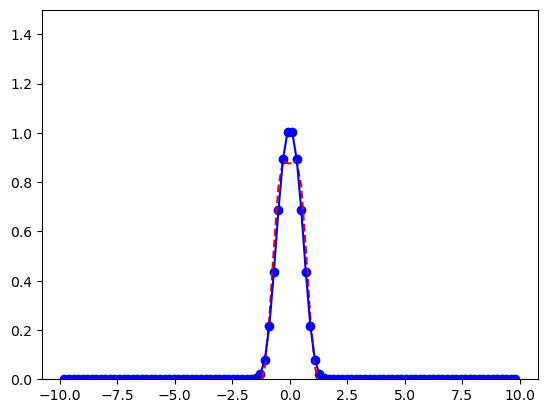

In [15]:
variationalfun=0
for i in range(nBasis):
    x=sp.symbols('x')
    variationalfun+=-1*estate2[i]*basisFn(x,i)
def vf(x):
    return sp.lambdify(x,variationalfun*variationalfun,'numpy')(x)
integrand,error = spi.quad(sp.lambdify(x,variationalfun*variationalfun,'numpy'),-1000,1000)
plt.plot(X,sp.lambdify(x,variationalfun,'numpy')(X)/np.sqrt(integrand),linestyle='--',color='red')
#plt.plot(X,trialf(X,result.x[0]),linestyle='--',label='Variational Ground state Wavefunction')
plt.scatter(X,estate,color='blue')
plt.plot(X,estate,color='blue')
plt.ylim(0,1.5)

In [16]:
#calculating error in energy calculations
Error1 = 100*((result.fun-min(eigenvalues1))/min(eigenvalues1))
Error2= 100*((min(eigenvalues)-min(eigenvalues1))/min(eigenvalues1))
print("Error wrt FDM in single beta basis:",Error1,"%")
print("Error wrt FDM in linear variational basis:",Error2,"%")


Error wrt FDM in single beta basis: 3.2385771638511693 %
Error wrt FDM in linear variational basis: (-20.769356326115663+0j) %


In [17]:
#Ques 4-7 : Hydrogen atom polarizability
(r,theta) = sp.symbols('r theta')
psi1s=(np.pi**(-0.5))*sp.exp(-r)
psi2pz=0.25*((2*np.pi)**(-0.5))*r*sp.exp(-r/2)*sp.cos(theta)
nBasis=2
def basisFn(i):
    if i==0:
        return psi1s
    if i==1:
        return psi2pz 
SMatr = np.zeros((nBasis, nBasis))
for i in range(nBasis):
    for j in range(nBasis):
        expression = (r**2)*sp.sin(theta)*basisFn(i)*basisFn(j)
        SMatr[i,j]= sp.integrate(expression,(r,0,1000),(theta,0,np.pi))
print(SMatr)

[[1.59154943e-01 5.00095631e-34]
 [5.00095631e-34 1.59154943e-01]]


In [31]:
mu=1
el=0
Z=1
E=sp.symbols('E')
HMatr1 = np.zeros((nBasis, nBasis))
for i in range(nBasis):
    for j in range(nBasis):
        dR_dr=sp.diff(basisFn(j),r)
        dR_dt=sp.diff(basisFn(j),theta)
        expression=(r*r)*sp.sin(theta)*basisFn(i)*((-1/(2*r*r))*(sp.diff(r*r*dR_dr,r)+sp.diff(sp.sin(theta)*dR_dt,theta)/sp.sin(theta))-(basisFn(j)/r))
        HMatr1[i,j]= sp.integrate(expression,(r,0,1000),(theta,0,np.pi))
        print(expression,"\n")

HMatr1

0.564189583547756*r**2*(-0.564189583547756*exp(-r)/r - (0.564189583547756*r**2*exp(-r) - 1.12837916709551*r*exp(-r))/(2*r**2))*exp(-r)*sin(theta) 

0.564189583547756*r**2*(-0.0997355701003582*exp(-r/2)*cos(theta) - (r**2*(0.0249338925250895*r*exp(-r/2)*cos(theta) - 0.0997355701003582*exp(-r/2)*cos(theta)) + 2*r*(-0.0498677850501791*r*exp(-r/2)*cos(theta) + 0.0997355701003582*exp(-r/2)*cos(theta)) - 0.199471140200716*r*exp(-r/2)*cos(theta))/(2*r**2))*exp(-r)*sin(theta) 

0.0997355701003582*r**3*(-0.564189583547756*exp(-r)/r - (0.564189583547756*r**2*exp(-r) - 1.12837916709551*r*exp(-r))/(2*r**2))*exp(-r/2)*sin(theta)*cos(theta) 

0.0997355701003582*r**3*(-0.0997355701003582*exp(-r/2)*cos(theta) - (r**2*(0.0249338925250895*r*exp(-r/2)*cos(theta) - 0.0997355701003582*exp(-r/2)*cos(theta)) + 2*r*(-0.0498677850501791*r*exp(-r/2)*cos(theta) + 0.0997355701003582*exp(-r/2)*cos(theta)) - 0.199471140200716*r*exp(-r/2)*cos(theta))/(2*r**2))*exp(-r/2)*sin(theta)*cos(theta) 



array([[-7.95774715e-02, -6.25119538e-35],
       [-2.50047815e-34, -1.98943679e-02]])

In [22]:
HMatr2 = np.zeros((nBasis, nBasis))
E=sp.symbols('E')
for i in range(nBasis):
    for j in range(nBasis):
        expression = (r**3)*sp.sin(theta)*sp.cos(theta)*basisFn(i)*basisFn(j)
        #print(expression)
        HMatr2[i,j]= sp.integrate(expression,(r,0,1000),(theta,0,np.pi))
print("HMatrix is :\n",HMatr1+E*HMatr2)

HMatrix is :
 [[8.9510318572898e-34*E - 0.0795774715459477
  0.1185601733211*E - 6.25119538262364e-35]
 [0.1185601733211*E - 2.50047815304947e-34 -0.0198943678864869]]


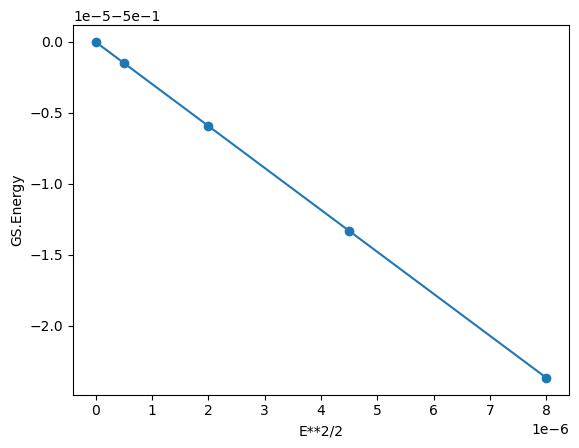

alpha = -slope :  (2.9596094266448603-0j)
Error in alpha: (35.15296863122141+0j)


In [41]:
GSEnergy=[]
Evals=[0,0.001,0.002,0.003,0.004]
for E in Evals:
    HMatr=HMatr1+E*HMatr2
    eigenvalues3, eigenvectors = scipy.linalg.eig(HMatr,SMatr)
    GSEnergy.append(min(eigenvalues3))
    #print(eigenvalues3)
    #print(min(eigenvalues3))
plt.plot(((np.array(Evals))**2)/2,np.array(GSEnergy))
plt.scatter(((np.array(Evals))**2)/2,np.array(GSEnergy))
plt.xlabel("E**2/2")
plt.ylabel("GS.Energy")
plt.show()
XVals=((np.array(Evals))**2)/2
alpha=-1*(GSEnergy[1]-GSEnergy[0])/(XVals[1]-XVals[0])
error=100*(4-alpha)/alpha
print("alpha = -slope : ",alpha)
print("Error in alpha:",error)






So our alpha value is coming out to be 2.95 and the actual alpha value is 4.0, with an error of 35 %.

In [46]:
HMatr=HMatr1+0.1*HMatr2
eigenvalues, eigenvectors = scipy.linalg.eig(HMatr,SMatr)
desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[0])[0][0] 
estate4 = eigenvectors[:, desired_eigenvalue_index]
variationalfun=0
for i in range(nBasis):
    variationalfun+=estate4[i]*basisFn(i)
expression = (r**2)*sp.sin(theta)*variationalfun*variationalfun
integral=sp.integrate(expression,(r,0,1000),(theta,0,np.pi))
variationalfun=variationalfun/integral
variationalfun.evalf()

0.117788400593437*r*exp(-r/2)*cos(theta) - 3.48172359332266*exp(-r)

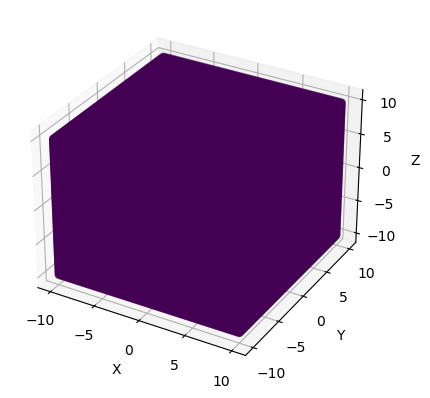

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import genlaguerre, eval_legendre
from scipy.constants import pi

# Define constants
a_0 = 1  # Bohr radius
n = 2     # Principal quantum number
l = 1     # Azimuthal quantum number

# Define grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
z = np.linspace(-10, 10, 100)
X, Y, Z = np.meshgrid(x, y, z)

# Define spherical coordinates
r = np.sqrt(X**2 + Y**2 + Z**2)
theta = np.arccos(Z / r)
phi = np.arctan2(Y, X)

psi = np.exp(-r**2)

# Plot the probability density (|psi|^2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
prob_density = np.abs(psi)**2
ax.scatter(X, Y, Z, c=prob_density, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


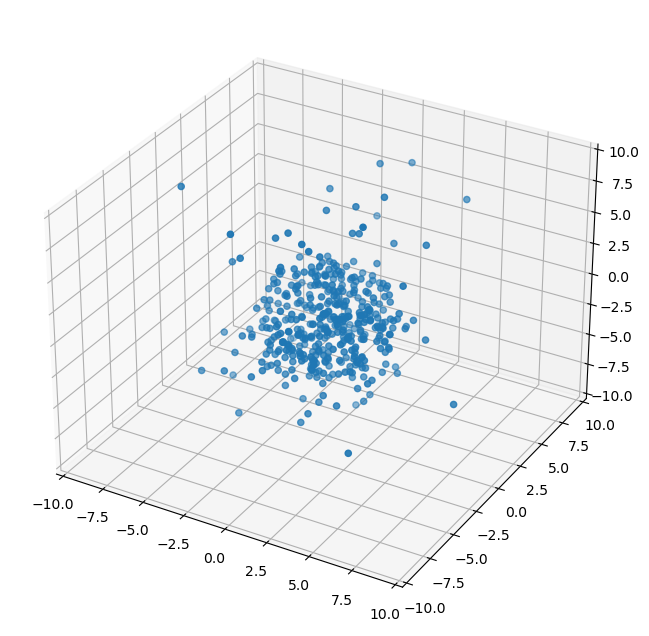

In [80]:
x,y,z=sp.symbols('x y z', real=True)
r,theta=symbols('r theta')
symbolic_exp=variationalfun.evalf()
expression=symbolic_exp.subs({r:sp.sqrt(x**2 + y**2 + z**2),theta:sp.acos(z / sp.sqrt(x**2 + y**2 + z**2))})
psi3D = sp.lambdify('x,y,z',expression, 'numpy')
psiSquared3D = sp.lambdify('x,y,z',expression*expression, 'numpy')
fig, axs= plt.subplots(1,1, figsize= (8,8),subplot_kw={"projection": "3d"})
accepted_xpoints=[]
accepted_ypoints=[]
accepted_zpoints=[]
for i in range(10000):
    xval = np.random.uniform(-10,10)
    yval= np.random.uniform(-10,10)
    zval= np.random.uniform(-10,10)
    if psiSquared3D(xval,yval,zval)>= np.random.uniform(0,0.01):
        accepted_xpoints.append(xval)
        accepted_ypoints.append(yval)
        accepted_zpoints.append(zval)
axs.set_xlim(-10,10)
axs.set_ylim(-10,10)
axs.set_zlim(-10,10)
axs.scatter(accepted_xpoints,accepted_ypoints,accepted_zpoints)
plt.show()


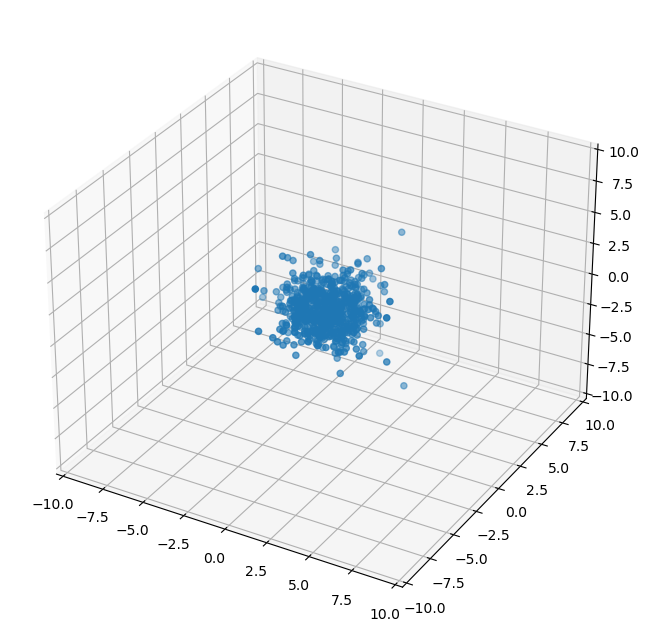

In [82]:
x,y,z=sp.symbols('x y z', real=True)
r,theta=symbols('r theta')
symbolic_exp=basisFn(0)
expression=symbolic_exp.subs({r:sp.sqrt(x**2 + y**2 + z**2),theta:sp.acos(z / sp.sqrt(x**2 + y**2 + z**2))})
psi3D = sp.lambdify('x,y,z',expression, 'numpy')
psiSquared3D = sp.lambdify('x,y,z',expression*expression, 'numpy')
fig, axs= plt.subplots(1,1, figsize= (8,8),subplot_kw={"projection": "3d"})
accepted_xpoints=[]
accepted_ypoints=[]
accepted_zpoints=[]
for i in range(100000):
    xval = np.random.uniform(-10,10)
    yval= np.random.uniform(-10,10)
    zval= np.random.uniform(-10,10)
    if psiSquared3D(xval,yval,zval)>= np.random.uniform(0,0.01):
        accepted_xpoints.append(xval)
        accepted_ypoints.append(yval)
        accepted_zpoints.append(zval)
axs.set_xlim(-10,10)
axs.set_ylim(-10,10)
axs.set_zlim(-10,10)
axs.scatter(accepted_xpoints,accepted_ypoints,accepted_zpoints)
plt.show()

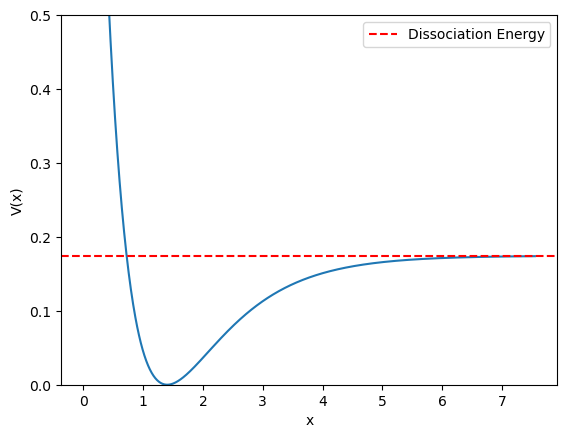

In [92]:
import scipy.constants as const
nPoints=1000
De = (7.61e-19)/const.physical_constants["Hartree energy"][0]
beta = (0.0193e12)*const.physical_constants["Bohr radius"][0]
x0 = (74.1e-12)/const.physical_constants["Bohr radius"][0]
mew = 1.660e-27/const.m_e
L= 400e-12/const.physical_constants["Bohr radius"][0]
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
x=[]
for i in range(nPoints):
    x.append(a*(i+1))
x=np.array(x)
V = De*(1-np.exp(-beta*(x-x0)))**2
plt.plot(x,V)
plt.xlabel("x")
plt.ylim(0,0.5)
plt.ylabel("V(x)")
plt.axhline(y=De, color='red', linestyle='--', label='Dissociation Energy')
plt.legend()
plt.show()

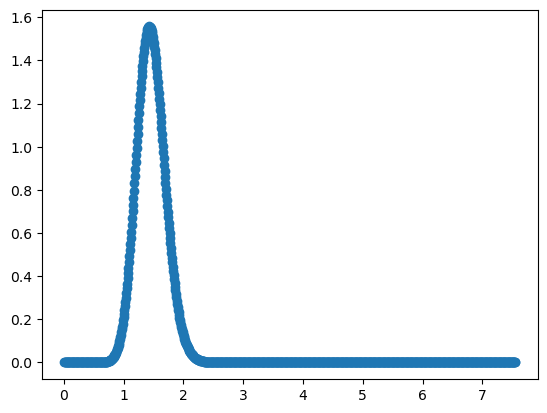

In [94]:
#Approximate Ground state energy
hMatr = np.zeros((nPoints,nPoints))
for i in range(nPoints):
    hMatr[i,i] = V[i]+2*t
for i in range(nPoints-1):
    hMatr[i,i+1]=-1*t
for i in range(1,nPoints):
    hMatr[i,i-1]=-1*t
eigenvalues1, eigenvectors = np.linalg.eig(hMatr)
desired_eigenvalue_index = np.where(eigenvalues1==np.sort(eigenvalues1)[0])[0][0]  # Change this to the index you want
estate = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
plt.plot(x,estate)
plt.scatter(x,estate)
plt.show()

In [99]:
trialfun= lambda x,L: ((2/L)**0.5)*sp.sin(sp.pi*(x-x0+L/2)/L)
def variationalEnergy(L):
    x=sp.symbols('x',real=True)
    V = sp.lambdify(x,De*(1-sp.exp(-beta*(x-x0)))**2,'numpy')
    dT_dx = sp.lambdify(x,sp.diff(trialfun(x,L),x),'numpy')
    dSqT_dxSq = sp.lambdify(x,sp.diff(sp.diff(trialfun(x,L),x),x),'numpy')
    def integrand1(x):
        return trialfun(x,L)*((-1/(2*mu))*(dSqT_dxSq(x))+V(x)*trialfun(x,L))
    def integrand2(x):
            return trialfun(x,L)*trialfun(x,L)
    integral1, error1 = spi.quad(integrand1,0,L)
    integral2, error2 = spi.quad(integrand2,0,L)
    return integral1/integral2
def objective_function(x):
    return variationalEnergy(x[0])
initial_guess = [1]
bounds = [(0.1,2)]
result = minimize(objective_function, initial_guess)
print('Minima at alpha=',result.x[0],'and Minimum energy value:',result.fun)
'''rvals = np.linspace(1e-6,4,100)
plt.plot(rvals,trialHAtom(rvals,1)/np.sqrt(np.pi),label='Exact groundstate wavefunction')
plt.plot(rvals,LorHAtom(rvals,result.x[0]),linestyle='--',label='Variational Ground state Wavefunction')
plt.legend()
plt.xlabel('r')
plt.ylabel(r'$\psi$')
plt.xlim(0)
plt.show()'''

Minima at alpha= 154.14833605441237 and Minimum energy value: 0.1755898732374636


"rvals = np.linspace(1e-6,4,100)\nplt.plot(rvals,trialHAtom(rvals,1)/np.sqrt(np.pi),label='Exact groundstate wavefunction')\nplt.plot(rvals,LorHAtom(rvals,result.x[0]),linestyle='--',label='Variational Ground state Wavefunction')\nplt.legend()\nplt.xlabel('r')\nplt.ylabel(r'$\\psi$')\nplt.xlim(0)\nplt.show()"

In [98]:
np.sort(eigenvalues1)[0]

0.009414882746046837

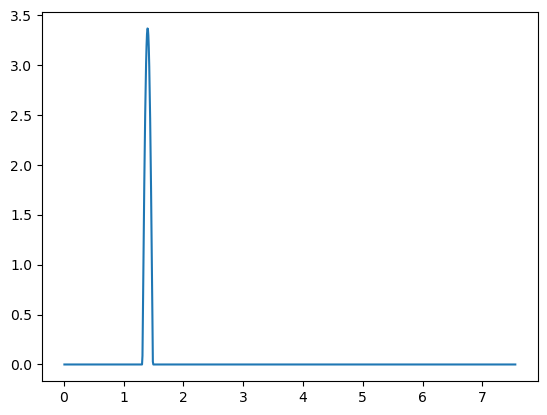

In [112]:
trialfun= lambda x,L: ((2/L)**0.5)*np.sin(np.pi*(x-x0+L/2)/L)
nPoints=1000
De = (7.61e-19)/const.physical_constants["Hartree energy"][0]
beta = (0.0193e12)*const.physical_constants["Bohr radius"][0]
x0 = (74.1e-12)/const.physical_constants["Bohr radius"][0]
mew = 1.660e-27/const.m_e
L= 400e-12/const.physical_constants["Bohr radius"][0]
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
x=[]
for i in range(nPoints):
    x.append(a*(i+1))
x=np.array(x)
variationalfun=np.zeros(nPoints)
F=trialfun(x,result.fun)
F[(x<x0-result.fun/2) | (x >x0+result.fun/2)]=0
plt.plot(x,F)


In [107]:
trialfun(x,result.fun)

array([ 3.29766165,  3.17089109,  2.9863281 ,  2.74733651,  2.45827216,
        2.12440352,  1.75181565,  1.34729932,  0.9182272 ,  0.47241955,
        0.01800161, -0.43674443, -0.8835304 , -1.3142132 , -1.72094325,
       -2.09630751, -2.43346462, -2.72626958, -2.96938574, -3.1583821 ,
       -3.28981401, -3.361286  , -3.37149544, -3.32025625, -3.2085023 ,
       -3.03827042, -2.81266324, -2.53579267, -2.21270492, -1.84928857,
       -1.45216721, -1.02857877, -0.58624352, -0.13322343,  0.32222477,
        0.77180013,  1.20730871,  1.62081297,  2.00477641,  2.35220094,
        2.65675443,  2.9128861 ,  3.11592771,  3.26217866,  3.34897337,
        3.37472993,  3.3389789 ,  3.24237189,  3.08666964,  2.87470997,
        2.61035604,  2.29842595,  1.94460492,  1.55534165,  1.13773084,
        0.69938383,  0.2482899 , -0.20732934, -0.65916981, -1.09899631,
       -1.51879257, -1.91090743, -2.26819423, -2.58414108, -2.85298957,
       -3.06983967, -3.23073909, -3.3327553 , -3.37402895, -3.35

In [111]:
F

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     